# Introduction to Time Series

## Forecasting Performance Metrics

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels as sm

%matplotlib inline

bike_sharing_df = pd.read_csv('bike_sharing_day.csv', index_col=0)
bike_sharing_df.dteday = pd.to_datetime(bike_sharing_df.dteday)

bike_sharing_df.set_index('dteday', inplace=True)
bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [2]:
def time_series_train_test_split(dataframe, target, pct=30):
    n = dataframe.shape[0]
    dataframe = dataframe.dropna().copy()
    train_n = int(n*(100-pct)/100)
    train_feats = list(dataframe.columns)
    train_feats.remove(target)
    return (dataframe[:train_n][train_feats],
            dataframe[train_n:][train_feats],
            dataframe[:train_n][target],
            dataframe[train_n:][target])

In [3]:
features = bike_sharing_df.drop(['casual','registered'], axis=1)

In [4]:
(feature_tr_df, 
 feature_ts_df, 
 target_tr, 
 target_ts) = time_series_train_test_split(features, 'cnt')

In [5]:
feature_tr_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
dteday,,,,,,,,,,,
2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446
2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539
2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309
2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296
2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900


In [6]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR, LinearSVR

from sklearn.metrics import mean_absolute_error, \
                            mean_squared_error, \
                            r2_score

def fit_predict_score(model):
    
    scores_train = { 'model': model, 'dataset': 'train'}
    scores_test = { 'model': model, 'dataset': 'test'}
    model.fit(feature_tr_df, target_tr)
    
    predictions_tr = model.predict(feature_tr_df)
    predictions_ts = model.predict(feature_ts_df)
    
    scores_train['mae'] = mean_absolute_error(target_tr, predictions_tr)
    scores_test['mae'] = mean_absolute_error(target_ts, predictions_ts)
    scores_train['mse'] = mean_squared_error(target_tr, predictions_tr)
    scores_test['mse'] = mean_squared_error(target_ts, predictions_ts)
    scores_train['rmse'] = np.sqrt(mean_squared_error(target_tr, predictions_tr))
    scores_test['rmse'] = np.sqrt(mean_squared_error(target_ts, predictions_ts))
    scores_train['r2'] = r2_score(target_tr, predictions_tr)
    scores_test['r2'] = r2_score(target_ts, predictions_ts)
    
    return [scores_train, scores_test]
    

In [7]:
results = (fit_predict_score(LinearRegression()) +
           fit_predict_score(Ridge()) +
           fit_predict_score(Lasso()) +
           fit_predict_score(DecisionTreeRegressor()) +
           fit_predict_score(KNeighborsRegressor()) +
           fit_predict_score(GradientBoostingRegressor()) +
           fit_predict_score(RandomForestRegressor()) +
           fit_predict_score(SVR()) +
           fit_predict_score(LinearSVR()))

In [8]:
results_df = pd.DataFrame(results)
results_df['model_name'] = results_df.model.apply(lambda x: x.__class__.__name__)
results_df = results_df[['model_name', 'model', 'dataset', 'mae', 'rmse', 'mse', 'r2']]

results_df

,model_name,model,dataset,mae,rmse,mse,r2
0,LinearRegression,"LinearRegression(copy_X=True, fit_intercept=Tr...",train,568.383406,745.525122,5.558077e+05,0.778689
1,LinearRegression,"LinearRegression(copy_X=True, fit_intercept=Tr...",test,832.845542,1120.883561,1.256380e+06,0.539283
2,Ridge,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",train,569.346115,749.198044,5.612977e+05,0.776503
3,Ridge,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",test,840.392436,1119.876040,1.254122e+06,0.540111
4,Lasso,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",train,568.321956,745.820017,5.562475e+05,0.778514
5,Lasso,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",test,836.213780,1120.992617,1.256624e+06,0.539194
6,DecisionTreeRegressor,"DecisionTreeRegressor(criterion='mse', max_dep...",train,0.000000,0.000000,0.000000e+00,1.000000
7,DecisionTreeRegressor,"DecisionTreeRegressor(criterion='mse', max_dep...",test,955.604545,1229.576052,1.511857e+06,0.445599
8,KNeighborsRegressor,"KNeighborsRegressor(algorithm='auto', leaf_siz...",train,469.331898,658.379610,4.334637e+05,0.827404
9,KNeighborsRegressor,"KNeighborsRegressor(algorithm='auto', leaf_siz...",test,2018.283636,2228.518391,4.966294e+06,-0.821149


In [9]:
short_names = {
    'LinearRegression' : 'linrg',
    'Ridge' : 'ridge',
    'Lasso' : 'lasso',
    'DecisionTreeRegressor' : 'dtree',
    'KNeighborsRegressor' : 'knnrg',
    'GradientBoostingRegressor' : 'grbst',
    'RandomForestRegressor' : 'rndfr',
    'SVR' : 'svreg',
    'LinearSVR' : 'svlin',
}
results_df['model_short_name'] = results_df.model_name.apply(lambda x: short_names[x])

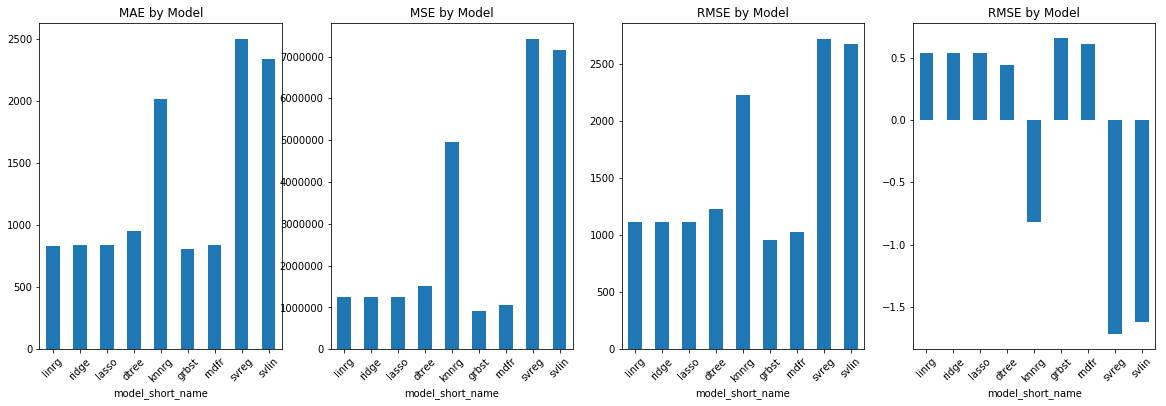

In [10]:
_, ax = plt.subplots(1,4,figsize=(20,6))
test_results_df = results_df[results_df.dataset == 'test']
test_results_df.set_index('model_short_name', drop=True, inplace=True)
test_results_df.mae.plot(kind='bar', rot=45, title='MAE by Model', ax=ax[0])
test_results_df.mse.plot(kind='bar', rot=45, title='MSE by Model', ax=ax[1])
test_results_df.rmse.plot(kind='bar', rot=45, title='RMSE by Model', ax=ax[2])
test_results_df.r2.plot(kind='bar', rot=45, title='RMSE by Model', ax=ax[3])